### Loading Data

This code snippet loads the CSV file into a pandas DataFrame.

In [65]:
import pandas as pd

df = pd.read_csv('data.csv')

### DataFrame

The variable `df` represents a pandas DataFrame containing the data from the CSV file.

In [66]:
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


### Extracting Feature

The variable `X` is assigned the column 'Message' from the DataFrame `df`, which contains the messages data.

In [67]:
X = df['Message']
X

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object

### Extracting Target

The variable `y` is assigned the column 'Category' from the DataFrame `df`, which contains the target labels.

In [68]:
y = df['Category']
y

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: Category, Length: 5572, dtype: object

### Encoding Labels

This code segment imports `LabelEncoder` from the `sklearn.preprocessing` module and initializes it. Then, it encodes the target labels stored in the variable `y` using the `fit_transform` method.

In [69]:
from sklearn.preprocessing import LabelEncoder

labelEncoder = LabelEncoder()
y = labelEncoder.fit_transform(y)

In [70]:
y

array([0, 0, 1, ..., 0, 0, 0])

### Splitting Data into Train and Test Sets

This code snippet imports `train_test_split` from the `sklearn.model_selection` module. It then splits the features (`X`) and target labels (`y`) into training and testing sets using a 75%-25% ratio. The parameter `random_state` is set to 42 for reproducibility.

In [71]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [72]:
X_train.describe()

count                       4179
unique                      3915
top       Sorry, I'll call later
freq                          19
Name: Message, dtype: object

In [73]:
from sklearn.feature_extraction.text import CountVectorizer

countVectorizer = CountVectorizer()

### Text Vectorization

This code imports `CountVectorizer` from `sklearn.feature_extraction.text` module, which is used to convert text data into a matrix of token counts. It initializes a `CountVectorizer` object for further text processing.

In [74]:
X_train_count = countVectorizer.fit_transform(X_train.values)

In [75]:
X_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

### Naive Bayes Classifier Training

This code segment imports the `MultinomialNB` class from `sklearn.naive_bayes` module, which represents a Naive Bayes classifier suitable for classification with discrete features. It initializes a `MultinomialNB` model object.

Then, it trains the model using the training data (`X_train_count` as features and `y_train` as target labels) using the `fit` method.

In [76]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train_count, y_train)

MultinomialNB()

### Transforming Test Data

This code snippet transforms the test data (`X_test`) using the previously initialized `CountVectorizer` object. It converts the text data into a matrix of token counts to prepare it for prediction by the trained model.

In [77]:
X_test_count = countVectorizer.transform(X_test)

### Model Evaluation

This code computes the accuracy score of the trained model (`model`) on the test data (`X_test_count` and `y_test`) using the `score` method. The accuracy score represents the proportion of correctly classified samples.

In [80]:
model.score(X_test_count, y_test)   

0.9885139985642498

### Prediction on New Data

This code snippet creates a list `ham_email` containing a single email message. It then transforms this text data using the previously initialized `CountVectorizer` object to convert it into a matrix of token counts (`ham_email_count`).

Finally, it uses the trained `model` to predict the category of the email, which in this case is expected to be 'ham' (non-spam).

In [92]:
ham_email = ['Hey, can we get together to watch football game tomorrow?']
ham_email_count = countVectorizer.transform(ham_email)
model.predict(ham_email_count)

array([0])

In [101]:
spam_email = ['WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.']
spam_email_count = countVectorizer.transform(spam_email)
model.predict(spam_email_count)

array([1])

### Confusion Matrix Visualization

This code segment imports necessary libraries for visualization (`seaborn` and `matplotlib.pyplot`) and for calculating the confusion matrix (`sklearn.metrics.confusion_matrix`). 

It then calculates the confusion matrix (`cm`) using the predicted labels (`y_pred`) and the true labels (`y_test`). 

Finally, it visualizes the confusion matrix using a heatmap, with annotations enabled to display the values, and labels for both predicted and true classes.

Text(95.72222222222221, 0.5, 'Truth')

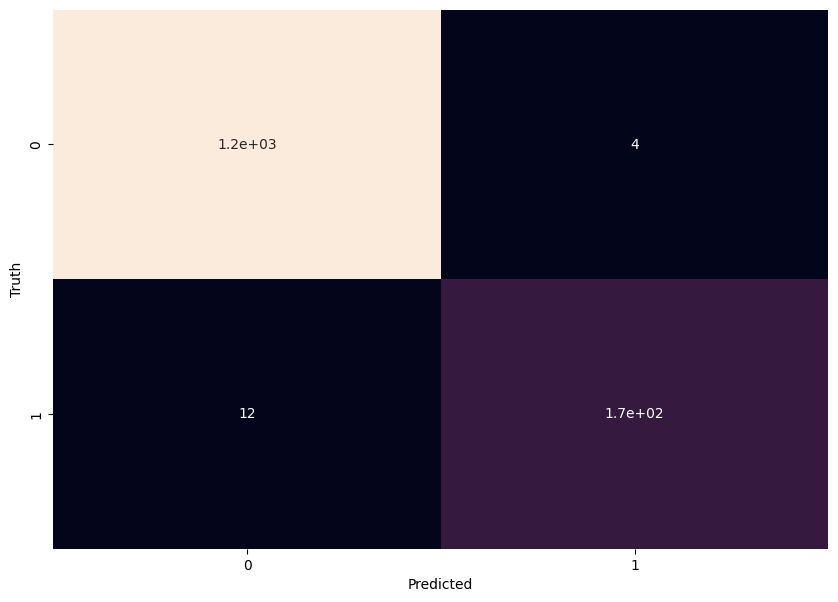

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test_count)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, cbar=False)

plt.xlabel('Predicted')
plt.ylabel('Truth')
